# **Exploratory Data Analysis of Road Traffic Colusion in UK**.
## The Problem Statement: 
1.   Quality Investigation of vehicles inolved in accidents
2.   Develop a prediction system for the likelihood of collisons

## Source of Data
### The dataset was generated from the Department of Transport UK. A record of RTC from 2004 to 2016. 
## Objectives of the Study
1.   Structural investigation: Explore the dataset size and features datatypes.
1.   Quality investigation: Explore if duplicates, missing values and unwanted  entries exists
1.   Content investigation: Perform analysis of features mutual depedence or correlations along with discovering the data distribution and data outliers.
2.   Ask bussiness problem related question and discover answers from data by analyzing them.  







In [4]:
# Importing required packages for the analysis
import statsmodels.api as sm
import warnings
import matplotlib
import matplotlib.pyplot as plt
import matplotlib as mpl
import os

%matplotlib inline
 
warnings.filterwarnings("ignore")
import pandas as pd
pd.plotting.register_matplotlib_converters()
import numpy as np
np.random.seed(1234)
import seaborn as sns
pd.set_option('display.max_columns', None)

In [5]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
vtc= pd.read_parquet("/content/drive/MyDrive/Colab Notebooks/RTC/new_data/vehicle_data_no_impute.parquet", engine='pyarrow')

In [7]:
vtc

,Accident_Index,Age_Band_of_Driver,Age_of_Vehicle,Driver_Home_Area_Type,Driver_IMD_Decile,Engine_Capacity_.CC.,Hit_Object_in_Carriageway,Hit_Object_off_Carriageway,Journey_Purpose_of_Driver,Junction_Location,make,model,Propulsion_Code,Sex_of_Driver,Skidding_and_Overturning,Towing_and_Articulation,Vehicle_Leaving_Carriageway,Vehicle_Location.Restricted_Lane,Vehicle_Manoeuvre,Vehicle_Reference,Vehicle_Type,Was_Vehicle_Left_Hand_Drive,X1st_Point_of_Impact,Year,Age_Band_of_Driver_missing,Age_of_Vehicle_missing,Driver_Home_Area_Type_missing,Driver_IMD_Decile_missing,Engine_Capacity_.CC._missing,Hit_Object_in_Carriageway_missing,Hit_Object_off_Carriageway_missing,Journey_Purpose_of_Driver_missing,Junction_Location_missing,make_missing,model_missing,Propulsion_Code_missing,Skidding_and_Overturning_missing,Was_Vehicle_Left_Hand_Drive_missing
0,200401BS00001,26 - 35,3.0,Urban area,4.0,1588.0,None,None,None,None,ROVER,45 CLASSIC 16V,Petrol,Male,None,No tow/articulation,Did not leave carriageway,0.0,Going ahead other,2,109,None,Front,2004,False,False,False,False,False,True,True,True,True,False,False,False,True,True
1,200401BS00002,26 - 35,NaN,Urban area,3.0,NaN,None,None,None,None,BMW,C1,None,Male,None,No tow/articulation,Did not leave carriageway,0.0,Going ahead other,1,109,None,Front,2004,False,True,False,False,True,True,True,True,True,False,False,True,True,True
2,200401BS00003,26 - 35,4.0,None,NaN,998.0,None,None,None,None,NISSAN,MICRA CELEBRATION 16V,Petrol,Male,None,No tow/articulation,Did not leave carriageway,0.0,Turning right,1,109,None,Front,2004,False,False,True,True,False,True,True,True,True,False,False,False,True,True
3,200401BS00003,66 - 75,NaN,None,NaN,NaN,None,None,None,None,LONDON TAXIS INT,TXII GOLD AUTO,None,Male,None,No tow/articulation,Did not leave carriageway,0.0,Going ahead other,2,109,None,Front,2004,False,True,True,True,True,True,True,True,True,False,False,True,True,True
4,200401BS00004,26 - 35,1.0,Urban area,4.0,124.0,None,None,None,None,PIAGGIO,VESPA ET4,Petrol,Male,None,No tow/articulation,Did not leave carriageway,0.0,Going ahead other,1,Motorcycle 125cc and under,None,Front,2004,False,False,False,False,False,True,True,True,True,False,False,False,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2177200,2016984131116,21 - 25,14.0,Urban area,NaN,1598.0,None,None,Not known,Mid Junction - on roundabout or on main road,MINI,MINI COOPER,Petrol,Female,None,No tow/articulation,Did not leave carriageway,0.0,Going ahead other,1,Car,No,Front,2016,False,False,False,True,False,True,True,False,False,False,False,False,True,False
2177201,2016984131116,56 - 65,NaN,Small town,NaN,1598.0,None,None,Commuting to/from work,Mid Junction - on roundabout or on main road,VAUXHALL,ASTRA ENERGY CDTI,Heavy oil,Female,None,No tow/articulation,Offside,0.0,Going ahead other,2,Car,No,Front,2016,False,True,False,True,False,True,True,False,False,False,False,False,True,False
2177202,2016984131216,56 - 65,NaN,Urban area,3.0,NaN,None,Central crash barrier,Journey as part of work,Not at or within 20 metres of junction,None,None,None,Male,None,No tow/articulation,Offside on to central reservation,0.0,Going ahead other,1,Goods 7.5 tonnes mgw and over,No,Offside,2016,False,True,False,False,True,True,False,False,False,True,True,True,True,False
2177203,2016984131316,16 - 20,13.0,Urban area,6.0,1796.0,None,Tree,Not known,Not at or within 20 metres of junction,VAUXHALL,VECTRA SXI 16V,Petrol,Male,Skidded,No tow/articulation,Offside,0.0,Going ahead other,1,Car,No,Front,2016,False,False,False,False,False,True,False,False,False,False,False,False,False,False


## Structural investigation of the Dataset

In [8]:
# checking for duplicates 
print("Total duplicates: ", vtc.duplicated().sum())

Total duplicates:  0


In [9]:
pd.value_counts(vtc.dtypes)

object     18
bool       14
float64     4
int64       2
dtype: int64

In [10]:
print("No of samples:", vtc.shape[0])
print("No of columns:", vtc.shape[1])

No of samples: 2172630
No of columns: 38


In [11]:
vtc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2172630 entries, 0 to 2177204
Data columns (total 38 columns):
 #   Column                               Dtype  
---  ------                               -----  
 0   Accident_Index                       object 
 1   Age_Band_of_Driver                   object 
 2   Age_of_Vehicle                       float64
 3   Driver_Home_Area_Type                object 
 4   Driver_IMD_Decile                    float64
 5   Engine_Capacity_.CC.                 float64
 6   Hit_Object_in_Carriageway            object 
 7   Hit_Object_off_Carriageway           object 
 8   Journey_Purpose_of_Driver            object 
 9   Junction_Location                    object 
 10  make                                 object 
 11  model                                object 
 12  Propulsion_Code                      object 
 13  Sex_of_Driver                        object 
 14  Skidding_and_Overturning             object 
 15  Towing_and_Articulation         

In [ ]:
vtc.isnull().sum()

Accident_Index                               0
Age_Band_of_Driver                      169554
Age_of_Vehicle                          356285
Driver_Home_Area_Type                   332358
Driver_IMD_Decile                       732279
Engine_Capacity_.CC.                    264110
Hit_Object_in_Carriageway              2084647
Hit_Object_off_Carriageway             1985762
Journey_Purpose_of_Driver               131960
Junction_Location                       120314
make                                    109457
model                                   323509
Propulsion_Code                         244141
Sex_of_Driver                                0
Skidding_and_Overturning               1894817
Towing_and_Articulation                      0
Vehicle_Leaving_Carriageway                  0
Vehicle_Location.Restricted_Lane             0
Vehicle_Manoeuvre                            0
Vehicle_Reference                            0
Vehicle_Type                                 0
Was_Vehicle_L

In [ ]:
# Missing values
print("% Missing Values: \n\n", np.round(100*vtc.isnull().mean().sort_values(ascending=False),2))

% Missing Values: 

 Hit_Object_in_Carriageway              95.95
Hit_Object_off_Carriageway             91.40
Skidding_and_Overturning               87.21
Driver_IMD_Decile                      33.70
Age_of_Vehicle                         16.40
Driver_Home_Area_Type                  15.30
model                                  14.89
Engine_Capacity_.CC.                   12.16
Propulsion_Code                        11.24
Age_Band_of_Driver                      7.80
Journey_Purpose_of_Driver               6.07
Was_Vehicle_Left_Hand_Drive             5.79
Junction_Location                       5.54
make                                    5.04
Hit_Object_off_Carriageway_missing      0.00
Accident_Index                          0.00
Hit_Object_in_Carriageway_missing       0.00
Engine_Capacity_.CC._missing            0.00
Journey_Purpose_of_Driver_missing       0.00
Skidding_and_Overturning_missing        0.00
Junction_Location_missing               0.00
make_missing                      

In [ ]:
vtc.describe().T

,count,mean,std,min,25%,50%,75%,max
Age_of_Vehicle,1816345.0,7.108259,4.725891,1.0,3.0,7.0,10.0,111.0
Driver_IMD_Decile,1440351.0,5.388131,2.821855,1.0,3.0,5.0,8.0,10.0
Engine_Capacity_.CC.,1908520.0,2042.155992,1950.094015,1.0,1299.0,1598.0,1997.0,96000.0
Vehicle_Location.Restricted_Lane,2172630.0,0.107239,0.879752,0.0,0.0,0.0,0.0,9.0
Vehicle_Reference,2172630.0,1.553513,0.775348,1.0,1.0,1.0,2.0,91.0
Year,2172630.0,2010.933169,3.689340,2004.0,2008.0,2011.0,2014.0,2016.0


## Structure for numerical attributes

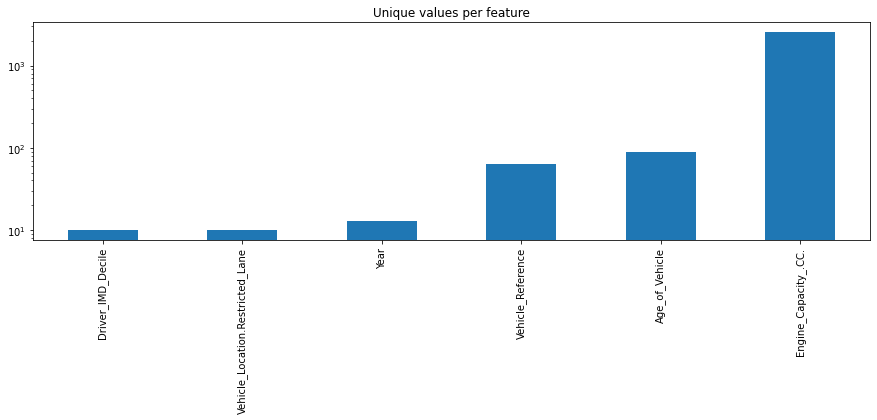

In [12]:
# For each numerical feature compute number of unique entries
unique_values = vtc.select_dtypes(include="number").nunique().sort_values()

# Plot information with y-axis in log-scale
unique_values.plot.bar(logy=True, figsize=(15, 4), title="Unique values per feature");

## For Non-Numerical columns

In [17]:
# Display non-numerical features
vtc.select_dtypes(exclude="number").head()

,Accident_Index,Age_Band_of_Driver,Driver_Home_Area_Type,Hit_Object_in_Carriageway,Hit_Object_off_Carriageway,Journey_Purpose_of_Driver,Junction_Location,make,model,Propulsion_Code,Sex_of_Driver,Skidding_and_Overturning,Towing_and_Articulation,Vehicle_Leaving_Carriageway,Vehicle_Manoeuvre,Vehicle_Type,Was_Vehicle_Left_Hand_Drive,X1st_Point_of_Impact,Age_Band_of_Driver_missing,Age_of_Vehicle_missing,Driver_Home_Area_Type_missing,Driver_IMD_Decile_missing,Engine_Capacity_.CC._missing,Hit_Object_in_Carriageway_missing,Hit_Object_off_Carriageway_missing,Journey_Purpose_of_Driver_missing,Junction_Location_missing,make_missing,model_missing,Propulsion_Code_missing,Skidding_and_Overturning_missing,Was_Vehicle_Left_Hand_Drive_missing
0,200401BS00001,26 - 35,Urban area,None,None,None,None,ROVER,45 CLASSIC 16V,Petrol,Male,None,No tow/articulation,Did not leave carriageway,Going ahead other,109,None,Front,False,False,False,False,False,True,True,True,True,False,False,False,True,True
1,200401BS00002,26 - 35,Urban area,None,None,None,None,BMW,C1,None,Male,None,No tow/articulation,Did not leave carriageway,Going ahead other,109,None,Front,False,True,False,False,True,True,True,True,True,False,False,True,True,True
2,200401BS00003,26 - 35,None,None,None,None,None,NISSAN,MICRA CELEBRATION 16V,Petrol,Male,None,No tow/articulation,Did not leave carriageway,Turning right,109,None,Front,False,False,True,True,False,True,True,True,True,False,False,False,True,True
3,200401BS00003,66 - 75,None,None,None,None,None,LONDON TAXIS INT,TXII GOLD AUTO,None,Male,None,No tow/articulation,Did not leave carriageway,Going ahead other,109,None,Front,False,True,True,True,True,True,True,True,True,False,False,True,True,True
4,200401BS00004,26 - 35,Urban area,None,None,None,None,PIAGGIO,VESPA ET4,Petrol,Male,None,No tow/articulation,Did not leave carriageway,Going ahead other,Motorcycle 125cc and under,None,Front,False,False,False,False,False,True,True,True,True,False,False,False,True,True


In [13]:
vtc.describe(exclude=['number','boolean']).T

,count,unique,top,freq
Accident_Index,2172630,1486281,2013460234852,53
Age_Band_of_Driver,2003076,11,26 - 35,449757
Driver_Home_Area_Type,1840272,3,Urban area,1434305
Hit_Object_in_Carriageway,87983,11,Kerb,34328
Hit_Object_off_Carriageway,186868,11,Other permanent object,56617
Journey_Purpose_of_Driver,2040670,7,Not known,832168
Junction_Location,2052316,9,Not at or within 20 metres of junction,806822
make,2063173,535,VAUXHALL,239358
model,1849121,35705,MISSING,11815
Propulsion_Code,1928489,12,Petrol,1141309


Towing_and_Articulation                0.981781
Vehicle_Location.Restricted_Lane       0.981670
Hit_Object_in_Carriageway_missing      0.959504
make_missing                           0.949620
Junction_Location_missing              0.944623
Was_Vehicle_Left_Hand_Drive_missing    0.942146
Was_Vehicle_Left_Hand_Drive            0.940361
Journey_Purpose_of_Driver_missing      0.939263
Age_Band_of_Driver_missing             0.921959
Hit_Object_off_Carriageway_missing     0.913990
dtype: float64

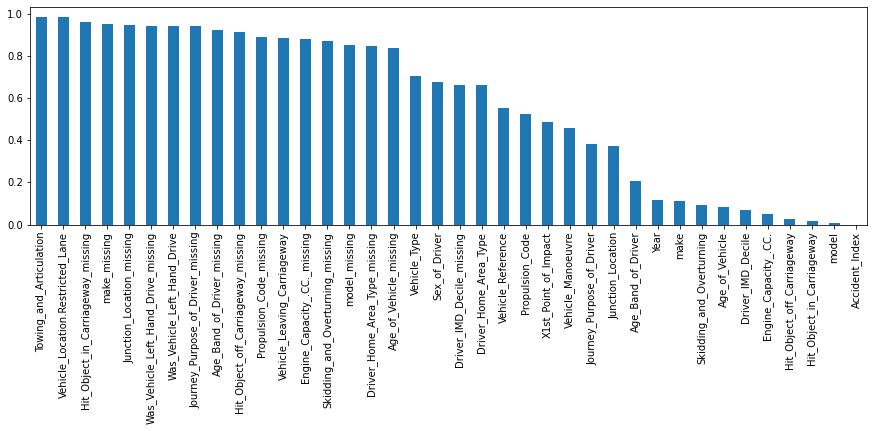

In [14]:
# get most frequent columns 
most_frequent_entry = vtc.mode()

# Checks for each entry if it contains the most frequent entry
df_freq = vtc.eq(most_frequent_entry.values, axis=1)

# Computes the mean of the 'is_most_frequent' occurrence
df_freq = df_freq.mean().sort_values(ascending=False)


display(df_freq.head(10))

df_freq.plot.bar(figsize=(15, 4));

### We can see the top 10 features which have almost repeating value in the whole dataset. For feature engineering, the following columns can be considered to be removed:
*  Was_Vehicle_Left_Hand_Drive => Right Handed
*  Towing_and_Articulation => No tow/articulation
*  Skidding_and_Overturning => Skidding
*  Hit_Object_in_Carriageway => kerb




In [16]:
# Missing values
print("% Missing Values: \n\n", np.round(100*vtc.isnull().mean().sort_values(ascending=False),2))

% Missing Values: 

 Hit_Object_in_Carriageway              95.95
Hit_Object_off_Carriageway             91.40
Skidding_and_Overturning               87.21
Driver_IMD_Decile                      33.70
Age_of_Vehicle                         16.40
Driver_Home_Area_Type                  15.30
model                                  14.89
Engine_Capacity_.CC.                   12.16
Propulsion_Code                        11.24
Age_Band_of_Driver                      7.80
Journey_Purpose_of_Driver               6.07
Was_Vehicle_Left_Hand_Drive             5.79
Junction_Location                       5.54
make                                    5.04
Hit_Object_off_Carriageway_missing      0.00
Accident_Index                          0.00
Hit_Object_in_Carriageway_missing       0.00
Engine_Capacity_.CC._missing            0.00
Journey_Purpose_of_Driver_missing       0.00
Skidding_and_Overturning_missing        0.00
Junction_Location_missing               0.00
make_missing                      

### Observing Duplicates within the dataset

In [18]:
# Check number of duplicates while ignoring the index feature
n_duplicates = vtc.drop(labels=["Accident_Index"], axis=1).duplicated().sum()
print(f"You have {n_duplicates} duplicates in your database.")

You have 45884 duplicates in your database.


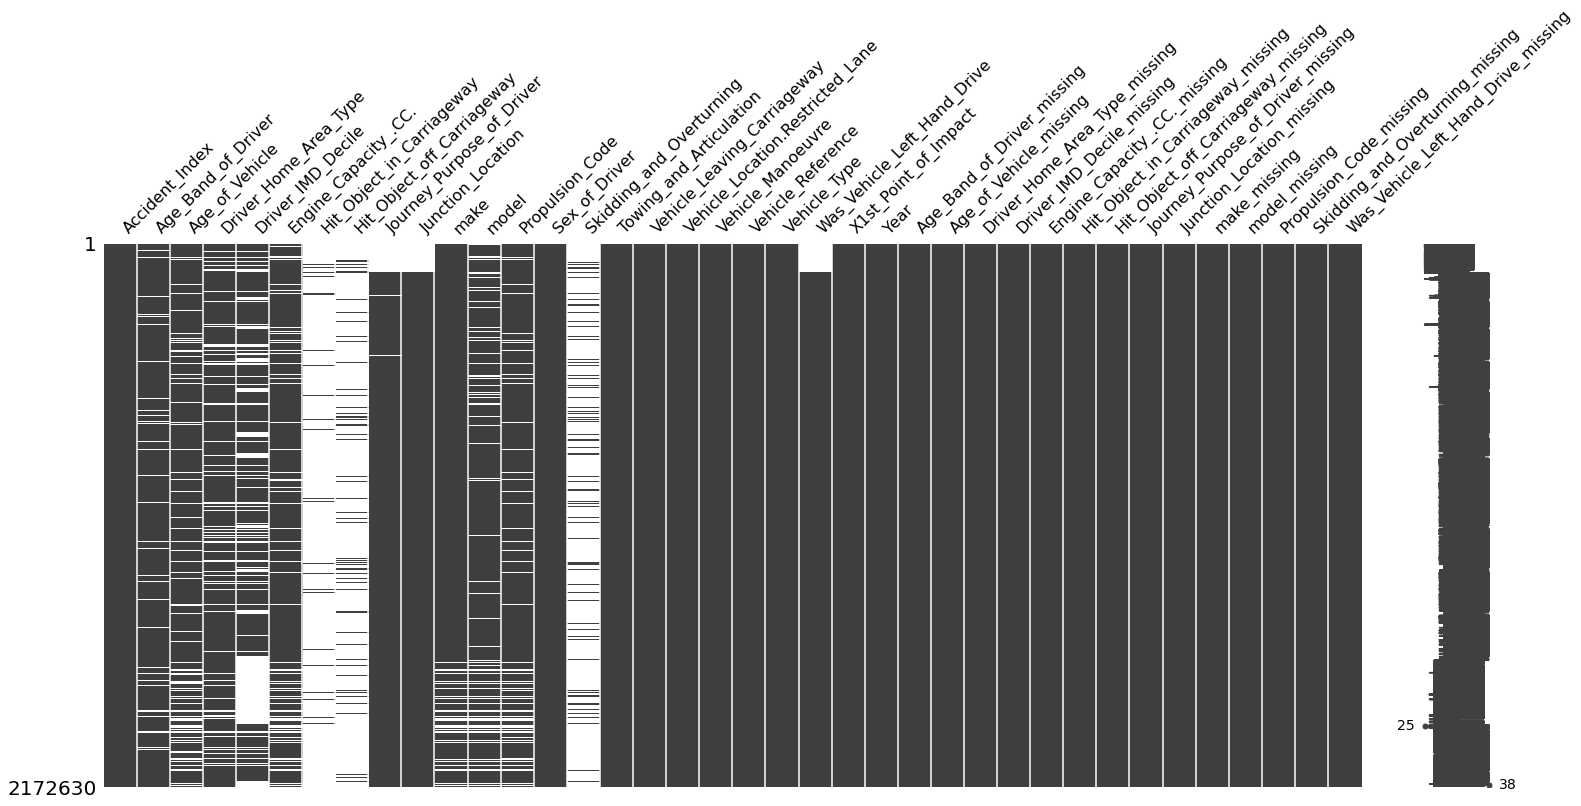

In [ ]:
import missingno as msno

msno.matrix(vtc)
plt.show()

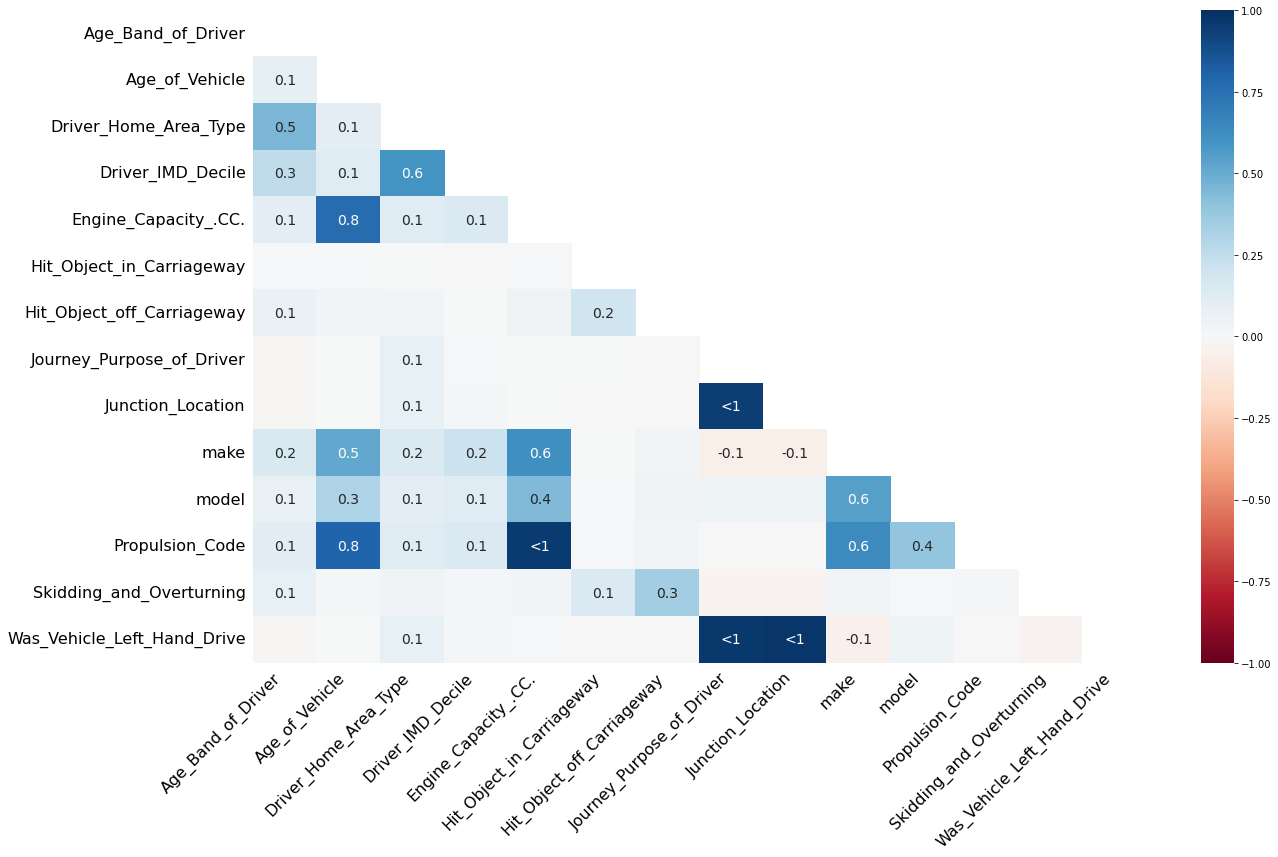

In [ ]:
msno.heatmap(vtc)
plt.show()

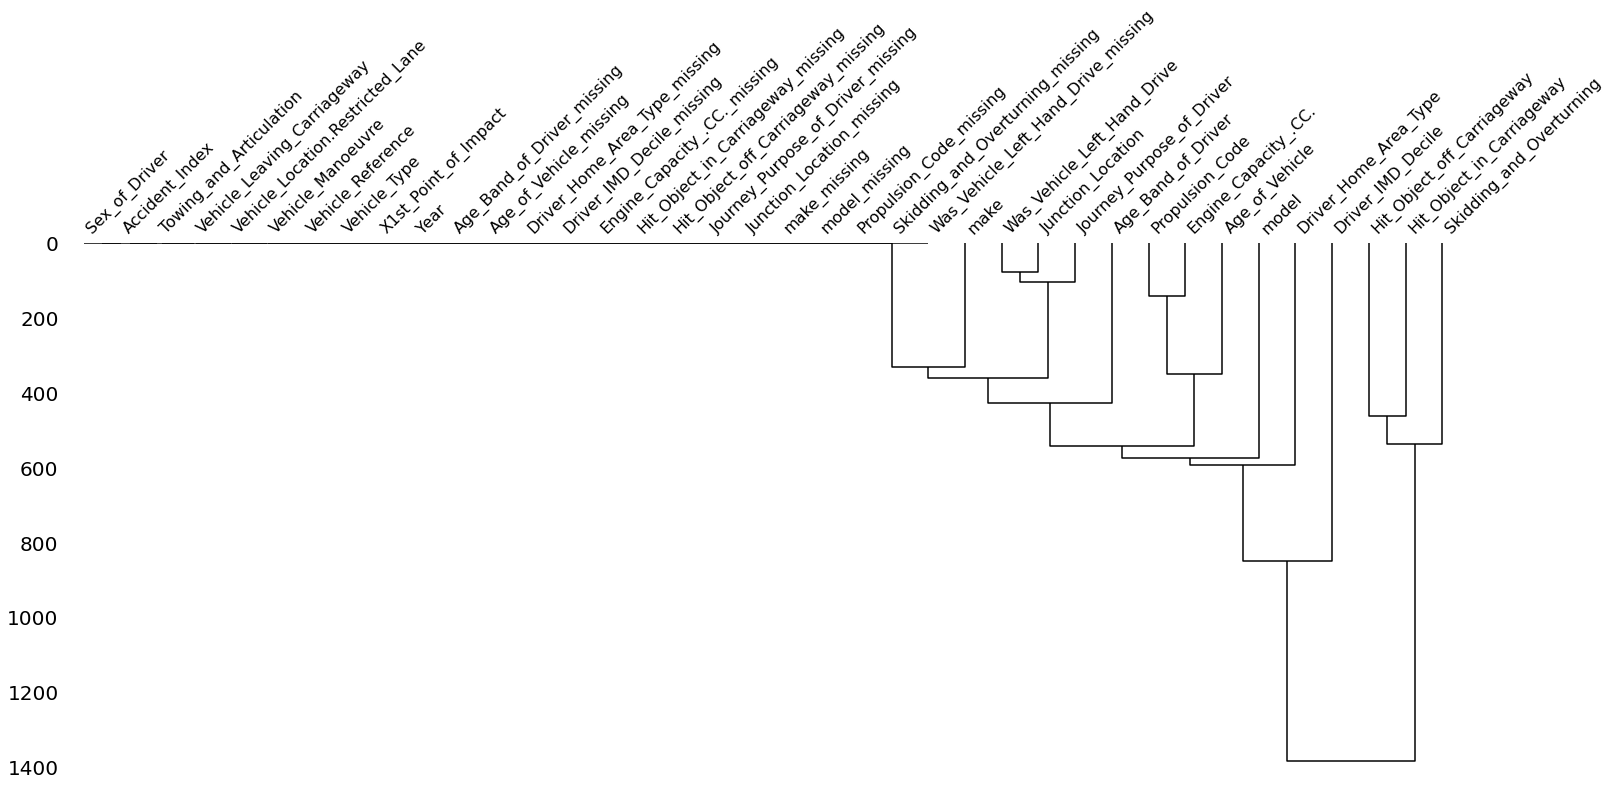

In [ ]:
msno.dendrogram(vtc)
plt.show()